In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import VerticalPitch

In [3]:
df=pd.read_csv("Man_city_conceded_Shots.csv")
df.head()

,Unnamed: 0,minute,second,player_name,team_name,outcome_name,statsbomb_xg,body_part_name,technique_id,period,location_x,location_y,play_pattern_name
0,89,1,25,Antoine Semenyo,AFC Bournemouth,Saved,0.171317,Left Foot,93.0,1,104.9,37.3,From Counter
1,92,1,28,Justin Kluivert,AFC Bournemouth,Saved,0.371699,Right Foot,93.0,1,111.1,49.5,From Counter
2,356,8,25,Antoine Semenyo,AFC Bournemouth,Goal,0.167977,Right Foot,93.0,1,113.5,37.5,Regular Play
3,380,10,21,Antoine Semenyo,AFC Bournemouth,Blocked,0.029033,Left Foot,93.0,1,103.1,57.4,Regular Play
4,1165,28,25,Justin Kluivert,AFC Bournemouth,Off T,0.021690,Right Foot,93.0,1,89.1,44.9,Regular Play


In [4]:
df["location_x"] = df["location_x"].clip(lower=0, upper=120) / 120 * 100
df["location_y"] = df["location_y"].clip(lower=0, upper=80) / 80 * 100

In [5]:
total_shots= df.shape[0]
total_goals = df[df["outcome_name"] == "Goal"].shape[0]
total_xG = df["statsbomb_xg"].sum()
xG_per_shot = total_xG / total_shots


In [6]:
# Color -> They went with a black so we'll do the same. Notice how it isn't a pure black but rather a lighter little bit of grey black
background_color='#0C0D0E'

# Font -> Fonts are tricky since they have their "brand fonts" so we'll just use something similar
import matplotlib.font_manager as font_manager
font_path = r"C:\Users\almagd\AppData\Local\Microsoft\Windows\Fonts\Arvo-Regular.ttf"
font_manager.fontManager.addfont(font_path)
font_props = font_manager.FontProperties(fname=font_path)


[]

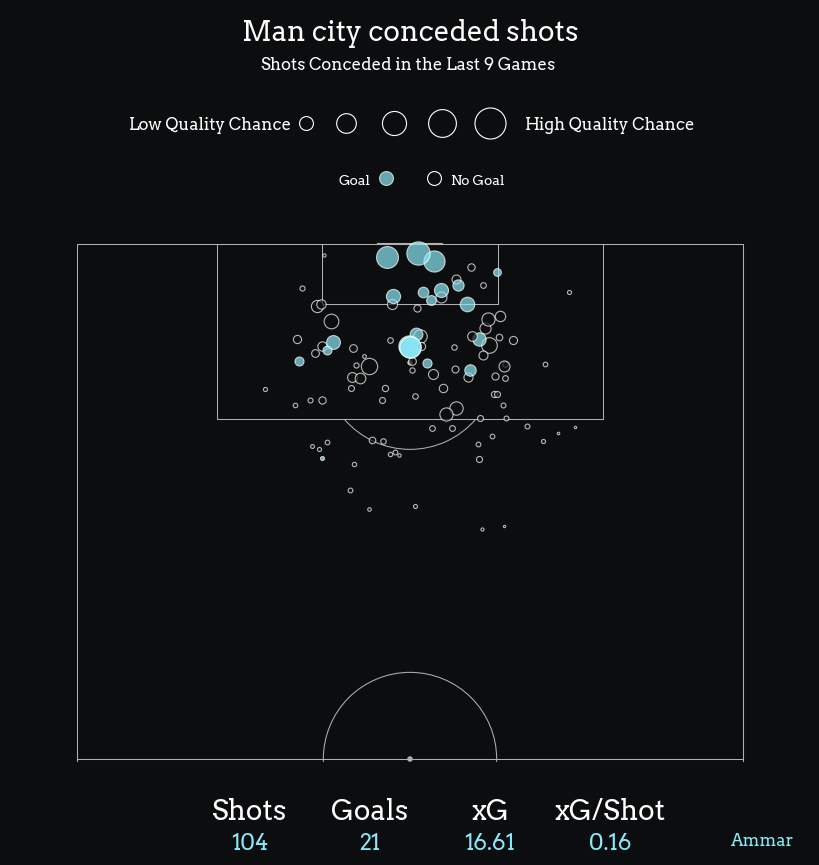

In [8]:
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

ax1 = fig.add_axes([0, .7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

# Remove spines for ax1
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.text(
    x=.5,
    y=.9,
    s='Man city conceded shots',
    ha='center',
    va='center',
    fontsize=20,
    color='white',
    fontproperties=font_props,
    fontweight='bold',
)
ax1.text(
    x=.5,
    y=.75,
    s='Shots Conceded in the Last 9 Games ',
    ha='center',
    fontsize=12,
    color='white',
    fontproperties=font_props,
    fontweight='bold',
)
ax1.text(
    x=.25,
    y=.5,
    s='Low Quality Chance',
    ha='center',
    fontsize=12,
    color='white',
    fontproperties=font_props,
    fontweight='bold',
)
ax1.scatter(
    x=.37,
    y=.53,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=.42,
    y=.53,
    s=200,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=.48,
    y=.53,
    s=300,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=.54,
    y=.53,
    s=400,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=.6,
    y=.53,
    s=500,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.text(
    x=.75,
    y=.5,
    s='High Quality Chance',
    ha='center',
    fontsize=12,
    color='white',
    fontproperties=font_props,
    fontweight='bold',
)
ax1.text(
    x=0.45,
    y=0.27,
    s=f'Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='right'
)
ax1.scatter(
    x=0.47,
    y=0.3,
    s=100,
    color='#8ae9f8',
    edgecolor='white',
    linewidth=.8,
    alpha=.7
)
ax1.scatter(
    x=0.53,
    y=0.3,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.text(
    x=0.55,
    y=0.27,
    s=f'No Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='left'
)
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_axes([.05, .25, .9, .5])
ax2.set_facecolor(background_color)

# Remove spines for ax2
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

pitch = VerticalPitch(
    pitch_type='opta',
    pitch_color=background_color,
    pad_bottom=.5,
    linewidth=.75,
    axis=True,
    label=True,
    half=True
)
pitch.draw(ax=ax2) 

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

for x in df.to_dict(orient="records"):
    pitch.scatter(
        x["location_x"],
        x["location_y"],
        s=300 * x["statsbomb_xg"],
        color="#8ae9f8" if x["outcome_name"] == "Goal" else background_color,
        ax=ax2,
        alpha=.7,
        edgecolor="white",
        linewidth=.8
    )

ax2.set_xticks([])
ax2.set_yticks([])

ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)

# Remove spines for ax3
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)

ax3.text(x=.30, y=.5, s='Shots', fontsize=20, color='white', fontproperties=font_props, fontweight='bold', ha='center')
ax3.text(x=.30, y=0, s=f'{total_shots}', fontsize=16, color='#8ae9f8', fontproperties=font_props, fontweight='bold', ha='center')

ax3.text(x=.45, y=.5, s='Goals', fontsize=20, color='white', fontproperties=font_props, fontweight='bold', ha='center')
ax3.text(x=.45, y=0, s=f'{total_goals}', fontsize=16, color='#8ae9f8', fontproperties=font_props, fontweight='bold', ha='center')

ax3.text(x=.60, y=.5, s='xG', fontsize=20, color='white', fontproperties=font_props, fontweight='bold', ha='center')
ax3.text(x=.60, y=0, s=f'{total_xG:.2f}', fontsize=16, color='#8ae9f8', fontproperties=font_props, fontweight='bold', ha='center')

ax3.text(x=.75, y=.5, s='xG/Shot', fontsize=20, color='white', fontproperties=font_props, fontweight='bold', ha='center')
ax3.text(x=.75, y=0, s=f'{xG_per_shot:.2f}', fontsize=16, color='#8ae9f8', fontproperties=font_props, fontweight='bold', ha='center')


ax3.text(
    x=0.98,  
    y=0,     
    s='Ammar',  
    fontsize=12,  
    color='#8ae9f8',  
    fontproperties=font_props,  
    fontweight='bold',  
    ha='right',  
    va='bottom'  
)
ax3.set_xticks([])
ax3.set_yticks([])
